# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
trainset=pd.read_csv('train.csv')
trainset['joining_date'].head()

0    17-08-2017
1    28-08-2017
2    11-11-2016
3    29-10-2016
4    12-09-2017
Name: joining_date, dtype: object

In [3]:
month=[]
d=np.array(trainset['joining_date'])
for il in range(len(d)):
    month.append(((2021-(int(d[il].split("-")[0])))*12)+int(d[il].split("-")[1]))
trainset['Month']=month
trainset['Month']=trainset['Month'].astype(int)

In [4]:
trainset.drop(['referral_id','security_no','Name','customer_id','joining_date'],axis=1,inplace=True)
trainset.shape

(36992, 20)

In [5]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,24056
1,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,23924
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,24131
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5,23914
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5,24117


# Data Pre-processing

In [6]:
def myfun(d_s):
    ar=np.array(d_s)
    for i in range(len(ar)):
        if(ar[i]=="?" or ar[i]=="Error" or ar[i]=="Unknown"):
            ar[i]=np.nan
    d_s=ar
    return d_s
def myfunint(d_set):
    a=np.array(d_set)
    for j in range(len(a)):
        if(a[j]<0):
            a[j]=0
    m=a.mean()
    for k in range(len(a)):
        if(a[k]==0):
            a[k]=int(m)
    d_set=a
    return d_set   

In [7]:
trainset['joined_through_referral'],trainset['gender'],trainset['medium_of_operation'],trainset['avg_frequency_login_days'],trainset['complaint_status']=myfun(trainset['joined_through_referral']),myfun(trainset['gender']),myfun(trainset['medium_of_operation']),myfun(trainset['avg_frequency_login_days']),myfun(trainset['complaint_status'])

In [8]:
trainset['days_since_last_login'],trainset['avg_time_spent']=myfunint(trainset['days_since_last_login']),myfunint(trainset['avg_time_spent'])

In [9]:
trainset.isnull().any()

age                             False
gender                           True
region_category                  True
membership_category             False
joined_through_referral          True
preferred_offer_types            True
medium_of_operation              True
internet_option                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days         True
points_in_wallet                 True
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
Month                           False
dtype: bool

###### Replacing of Nan values

In [10]:
col=['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation']
for c in range(len(col)):
    trainset[col[c]]=trainset[col[c]].fillna(value=trainset[col[c]].mode().iloc[0])

In [11]:
trainset['avg_frequency_login_days']=trainset['avg_frequency_login_days'].astype(float)
trainset['avg_frequency_login_days']=trainset['avg_frequency_login_days'].fillna(value=trainset['avg_frequency_login_days'].mean())
trainset['points_in_wallet']=trainset['points_in_wallet'].fillna(value=trainset['points_in_wallet'].mean())

In [12]:
trainset.isnull().any()

age                             False
gender                          False
region_category                 False
membership_category             False
joined_through_referral         False
preferred_offer_types           False
medium_of_operation             False
internet_option                 False
days_since_last_login           False
avg_time_spent                  False
avg_transaction_value           False
avg_frequency_login_days        False
points_in_wallet                False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
churn_risk_score                False
Month                           False
dtype: bool

###### Label Encoding

In [13]:
df_col=['gender','offer_application_preference','region_category','membership_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','past_complaint','complaint_status','feedback']
for i in range(len(df_col)):
    trainset[df_col[i]] = LabelEncoder().fit_transform(trainset[df_col[i]])

In [14]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,1,0,1,4,2,24056
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,0,1,2,5,1,23924
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,3,3,5,24131
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,4,3,5,23914
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,2,3,5,24117


In [15]:
trainset['churn_risk_score'].value_counts()


 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

# Data Visualisations

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'days_since_last_login'}>,
        <AxesSubplot:title={'center':'avg_time_spent'}>],
       [<AxesSubplot:title={'center':'avg_transaction_value'}>,
        <AxesSubplot:title={'center':'avg_frequency_login_days'}>,
        <AxesSubplot:title={'center':'points_in_wallet'}>],
       [<AxesSubplot:title={'center':'offer_application_preference'}>,
        <AxesSubplot:title={'center':'used_special_discount'}>,
        <AxesSubplot:>]], dtype=object)

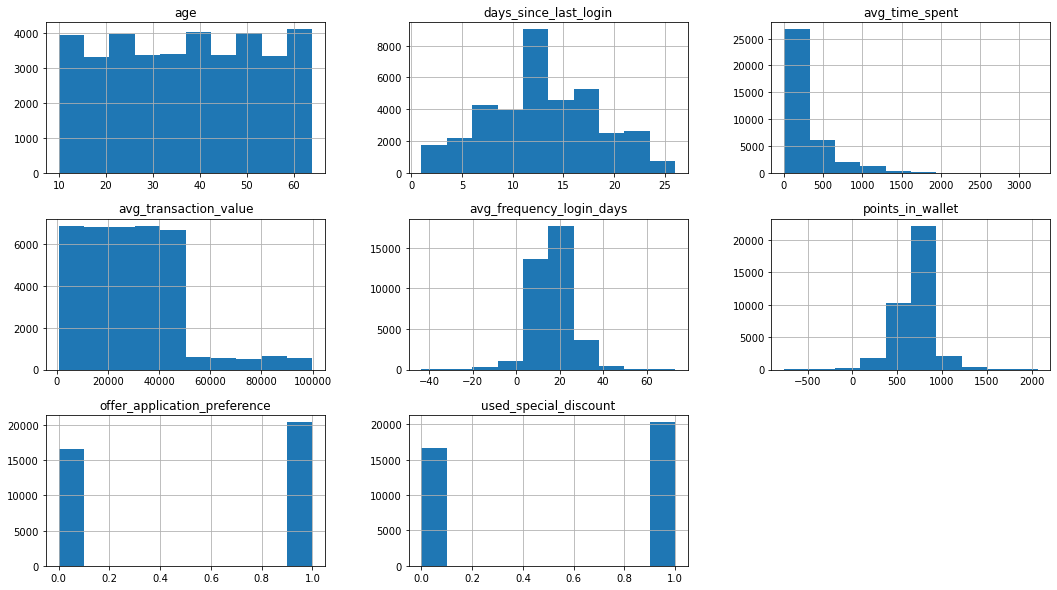

In [16]:
trainset.hist(['age','days_since_last_login','avg_time_spent','avg_transaction_value'
                 ,'avg_frequency_login_days','points_in_wallet','offer_application_preference','used_special_discount'],figsize=(18,10),)

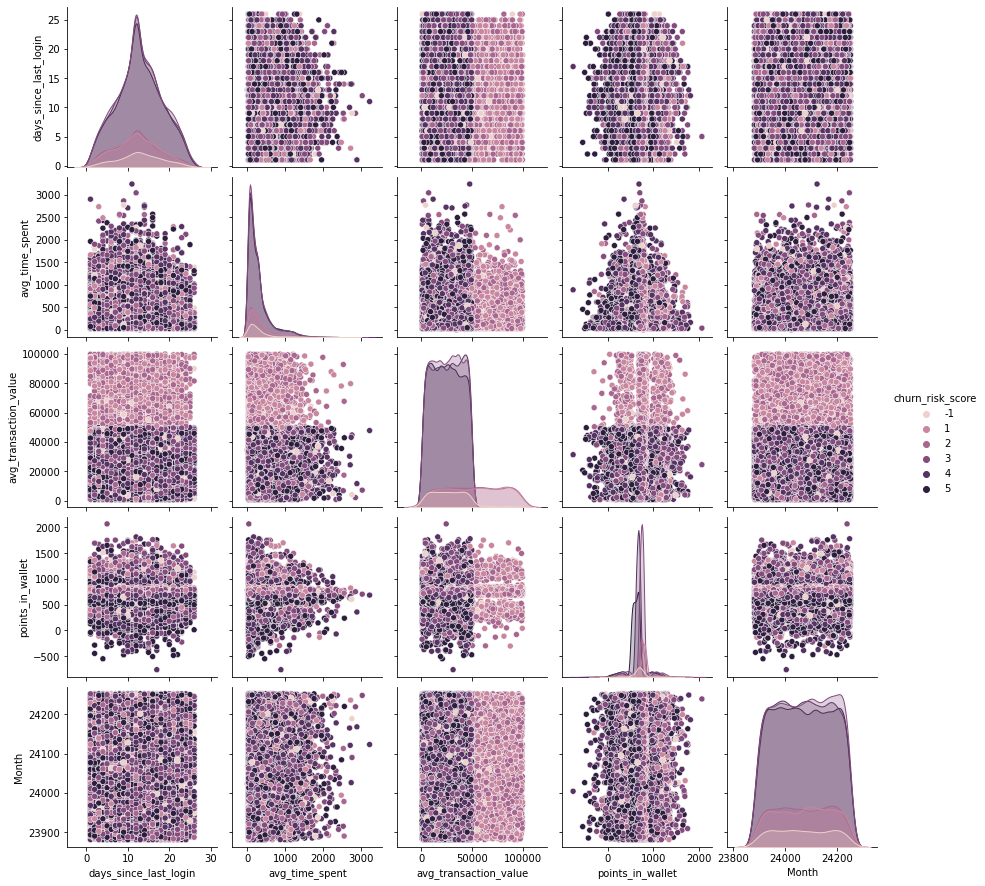

In [17]:
sns.pairplot(trainset, vars=['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet','Month'], hue = "churn_risk_score")

# Feture Extraction

###### Checking if any duplicate rows

In [18]:
dups = trainset.duplicated()
print(dups.any())
#print(trainset[dups])

False


###### Correlation

<AxesSubplot:>

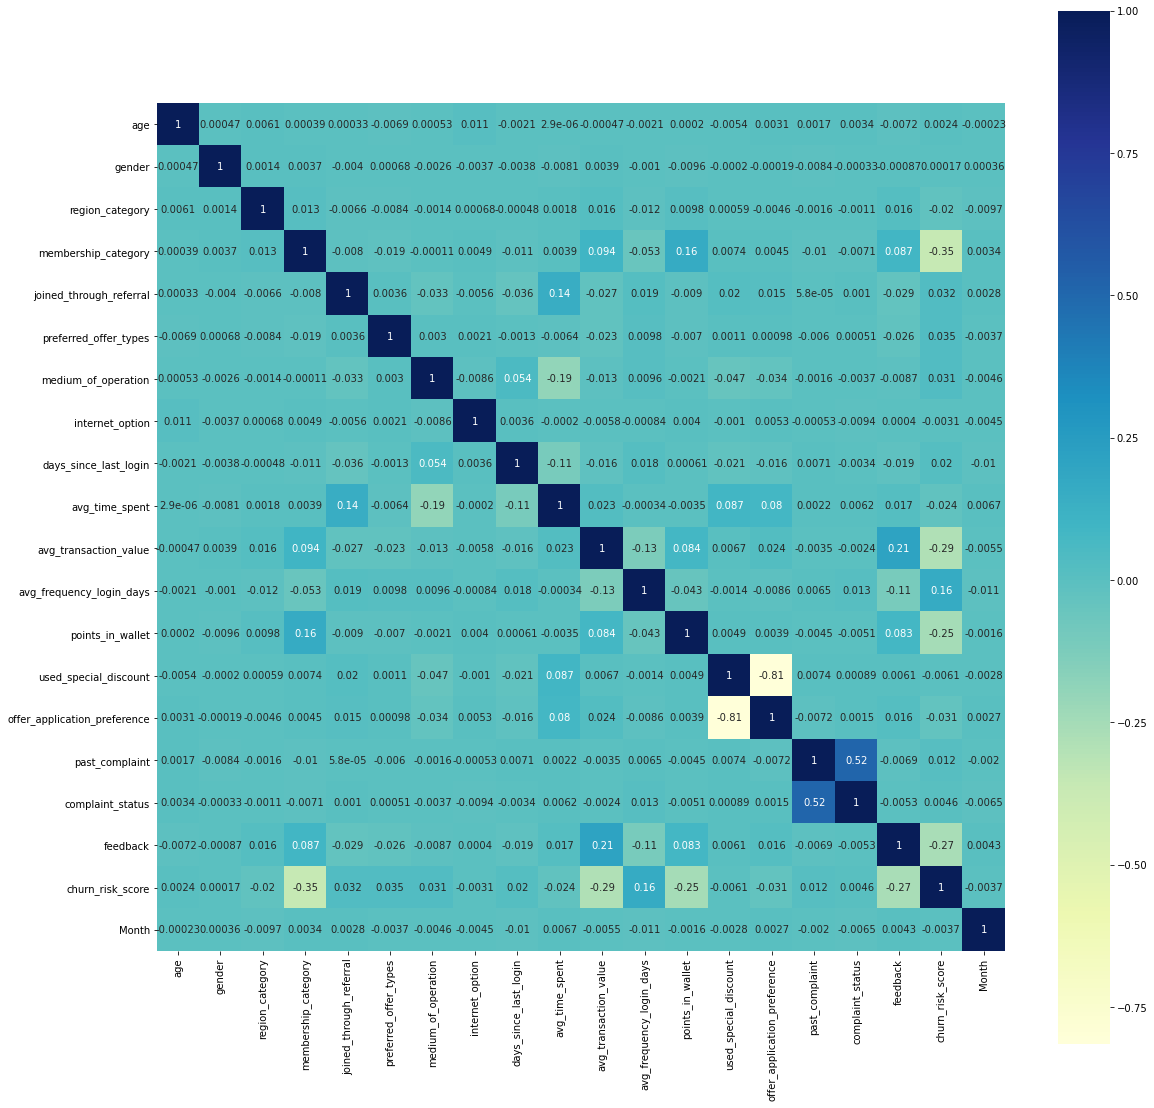

In [19]:
corr = trainset.corr()
plt.figure(figsize=(19,19))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

In [20]:
def correlation(trainset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = trainset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(trainset, 0.8)
len(set(corr_features))

1

In [22]:
corr_features

{'offer_application_preference'}

In [23]:
trainset.drop('offer_application_preference', axis=1,inplace=True)

###### Varaince Threshold

In [24]:
x=trainset.drop(labels=['churn_risk_score'], axis=1)
y=trainset['churn_risk_score']
x.shape

(36992, 18)

In [25]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [26]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [27]:
len(x.columns[var_thres.get_support()])
#sum(var_thres.get_support())
x.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount', 'past_complaint',
       'complaint_status', 'feedback', 'Month'],
      dtype='object')

In [28]:
constant_columns = [column for column in x.columns
                    if column not in x.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [29]:
for column in constant_columns:
    print(column)

In [30]:
trainset.shape

(36992, 19)

In [31]:
trainset.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,past_complaint,complaint_status,feedback,churn_risk_score,Month
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,0,1,4,2,24056
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,1,2,5,1,23924
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,3,3,5,24131
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,4,3,5,23914
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,2,3,5,24117


# Balancing the data

In [32]:
y=trainset['churn_risk_score']
x=trainset
x.drop('churn_risk_score',axis=1,inplace=True)

In [33]:
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_sample(x,y.ravel())

In [34]:
list1 = y_res.tolist()
y_res = pd.Series(list1,name='churn_risk_score')
print(y_res.value_counts(),y)

 1    10424
 2    10424
 3    10424
 4    10424
 5    10424
-1    10424
Name: churn_risk_score, dtype: int64 0        2
1        1
2        5
3        5
4        5
        ..
36987    4
36988    5
36989    4
36990    3
36991    2
Name: churn_risk_score, Length: 36992, dtype: int64


# train test split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=0)


# Modelling

# Random Forest Classifier

In [53]:
rt=RandomForestClassifier(criterion='gini',n_estimators=55,random_state=0,min_samples_leaf=16,max_depth=15)

In [54]:
rt.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=16, n_estimators=55,
                       random_state=0)

In [55]:
import pickle
pickle.dump(rt,open('randomfin.pkl','wb'))

In [56]:
y_predict_test=rt.predict(x_test)
y_predict_test

array([-1,  3, -1, ...,  2,  2, -1], dtype=int64)

In [57]:
acc_test=accuracy_score(y_test,y_predict_test)
acc_test

0.7071708369973619

In [58]:
y_predict_train=rt.predict(x_train)
y_predict_train

array([ 3,  1, -1, ..., -1,  4, -1], dtype=int64)

In [59]:
acc_train=accuracy_score(y_train,y_predict_train)
acc_train

0.8009393424602778

In [60]:
confusion_matrix(y_test,y_predict_rc)

array([[1162,  115,  167,  230,  165,  264],
       [  27, 1528,  503,   19,    3,    9],
       [  24,  332, 1684,   23,    9,   10],
       [  55,   14,   28, 1776,  151,   24],
       [ 145,    4,    8,  202, 1107,  622],
       [ 120,    7,    0,   12,  371, 1589]], dtype=int64)

In [61]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

          -1       0.76      0.55      0.64      2103
           1       0.76      0.73      0.75      2089
           2       0.70      0.81      0.75      2082
           3       0.79      0.87      0.82      2048
           4       0.61      0.53      0.57      2088
           5       0.63      0.76      0.69      2099

    accuracy                           0.71     12509
   macro avg       0.71      0.71      0.70     12509
weighted avg       0.71      0.71      0.70     12509

